In [1]:
from sklearn import svm
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 

In [20]:
import pandas as pd
output_path = '/Users/Hesham/dev/fluffDecoder/data/'
p = pd.read_csv(output_path + 'ST-1441993385_2.0.csv')

In [21]:
p = p.drop(['date', 'window'], axis=1).astype(float)


In [22]:
p.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
0,1.539780e+09,0.59,4.31,4.59,2.94,6.66,2.94,2.98,82.91,1.87,...,7.0,5.0,5.0,62.0,65.0,0.0,0.0,0.0,4.0,3.0
1,1.539780e+09,-0.35,5.35,0.30,1.40,7.61,1.40,0.58,46.14,0.06,...,7.0,5.0,5.0,62.0,65.0,0.0,0.0,0.0,4.0,3.0
2,1.539781e+09,-1.83,2.06,6.34,1.77,6.55,1.77,0.60,25.90,0.90,...,7.0,5.0,5.0,62.0,65.0,0.0,0.0,0.0,4.0,3.0
3,1.539781e+09,-1.31,1.41,5.96,1.63,7.31,1.63,-0.84,28.71,-0.46,...,7.0,5.0,5.0,62.0,65.0,0.0,0.0,0.0,4.0,3.0
4,1.539781e+09,-1.63,1.24,6.45,1.45,6.76,1.45,-0.47,31.63,-0.36,...,7.0,5.0,5.0,62.0,65.0,0.0,0.0,0.0,4.0,3.0


In [23]:
y = p[['phq_1']]
t1, t2 = train_test_split(p, stratify=y, test_size=0.5, random_state=42, shuffle=True)

In [24]:
len(t1.index)

95227

In [7]:
# train_set, test_set = train_test_split(p, test_size=0.25, random_state=42, shuffle=True)

In [25]:
y = p[['phq_1']]
train_set_st, test_set_st = train_test_split(p, stratify=y, test_size=0.25, random_state=42, shuffle=True)

In [26]:
train_set_st.head()

,time,accX,accX_std,accY,accY_std,accZ,accZ_std,gyrX,gyrX_std,gyrY,...,tense,tired,rumination,socialize,socialize_val,sport_time,work_time,day_sleep,phq_1,phq_2
180235,1.564664e+09,-4.04,4.70,-5.93,3.81,0.57,3.81,0.72,135.63,5.36,...,9.0,9.0,10.0,11.0,91.0,0.0,0.0,150.0,3.0,2.0
180088,1.564653e+09,-0.14,0.08,-3.65,0.29,8.97,0.29,-0.44,3.41,-0.42,...,9.0,9.0,10.0,11.0,91.0,0.0,0.0,150.0,3.0,2.0
45404,1.545342e+09,6.48,4.74,4.74,2.77,-1.67,2.77,-1.04,62.10,0.35,...,7.0,8.0,8.0,26.0,86.0,0.0,0.0,115.0,3.0,5.0
44022,1.545115e+09,7.39,2.91,4.06,2.45,-2.63,2.45,-1.24,27.66,0.08,...,4.0,7.0,10.0,6.0,49.0,0.0,115.0,245.0,10.0,7.0
166038,1.562643e+09,-0.20,0.22,-2.96,0.25,9.21,0.25,-0.44,3.42,-0.36,...,7.0,8.0,10.0,30.0,73.0,0.0,0.0,145.0,3.0,3.0


In [27]:
X_train_st = train_set_st.loc[:,'accX':'work_time']
y_train_st_1 = train_set_st.loc[:, ['phq_1']].values.ravel()
# y_train_st_2 = train_set_st.loc[:, ['phq_2']].values.ravel()

X_test_st = test_set_st.loc[:,'accX':'work_time']
y_test_st_1 = test_set_st[['phq_1']].values.ravel()
# y_test_st_2 = test_set_st[['phq_2']].values.ravel()

In [66]:
X_train_st.columns

Index(['accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std', 'gyrX',
       'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'SmoothedAirPressure', 'SAP_std',
       'UncalibratedBarometerAltitude', 'UBA_std', 'AirTemperature', 'AT_std',
       'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'alc', 'mood',
       'tense', 'tired', 'rumination', 'socialize', 'socialize_val',
       'sport_time', 'work_time'],
      dtype='object')

In [28]:
time_st = train_set_st[['time']].values.ravel()
time_st_test = test_set_st[['time']].values.ravel()

In [29]:
# Scaling the Train and Test feature set 
from sklearn.preprocessing import StandardScaler
scaler_st = StandardScaler()
X_train_st_scaled = scaler_st.fit_transform(X_train_st)
X_test_st_scaled = scaler_st.transform(X_test_st)

In [13]:
parameters = {'epsilon':[0,0.1,0.2,0.5,1],
               'tol':[1e-1, 1e-3,1e-5],
              'C':[1, 1.5, 10, 50]
              }

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

svr = LinearSVR(random_state=42)
regressor_st = GridSearchCV(svr, parameters, n_jobs=-1, cv=3, scoring='neg_mean_absolute_error')
regressor_st

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [15]:
regressor_st.fit(X_train_st_scaled, y_train_st_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=0.0001, verbose=0),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'epsilon': [0, 0.1, 0.2, 0.5, 1], 'tol': [0.1, 0.001, 1e-05], 'C': [1, 1.5, 10, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=0)

In [16]:
regressor_st.best_params_

{'C': 1, 'epsilon': 0, 'tol': 1e-05}

In [54]:
regressor_st.best_estimator_

LinearSVR(C=1, dual=True, epsilon=0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=1e-05, verbose=0)

In [55]:
from sklearn.metrics import mean_absolute_error

pred_test_st = regressor_st.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

1.458909078376748

In [56]:
pred_train_st = regressor_st.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

1.4548321796269987

In [57]:
model = regressor_st.best_estimator_

In [58]:
model.coef_

array([-0.02994216, -0.04851479,  0.05615922, -0.03521657, -0.0510719 ,
       -0.03521657, -0.00817472, -0.08657047, -0.00673003,  0.12002916,
       -0.01032613, -0.07384537,  0.01106679, -0.00185805, -0.20971938,
       -0.16652378,  0.00563048,  0.02495537, -0.19041893,  0.01398528,
        0.06366407,  0.14676864,  0.19866283,  0.11182247, -0.04038841,
       -0.29410554, -0.79827954,  0.07785083, -0.25178552, -0.39288586,
       -0.34067911, -0.13609081, -0.12560415])

In [59]:
cvrs = regressor_st.cv_results_
index = 1
for mean_score, params in zip(cvrs['mean_train_score'], cvrs['params']):
    print(index, mean_score, params)
    index = index + 1

1 -1.533438281151974 {'C': 1, 'epsilon': 0, 'tol': 0.1}
2 -1.4552332698180137 {'C': 1, 'epsilon': 0, 'tol': 0.001}
3 -1.4549676982155173 {'C': 1, 'epsilon': 0, 'tol': 1e-05}
4 -1.4933147472131925 {'C': 1, 'epsilon': 0.1, 'tol': 0.1}
5 -1.4551358938551495 {'C': 1, 'epsilon': 0.1, 'tol': 0.001}
6 -1.4549326247353178 {'C': 1, 'epsilon': 0.1, 'tol': 1e-05}
7 -1.4816617741884055 {'C': 1, 'epsilon': 0.2, 'tol': 0.1}
8 -1.4554304415731754 {'C': 1, 'epsilon': 0.2, 'tol': 0.001}
9 -1.4554353917121297 {'C': 1, 'epsilon': 0.2, 'tol': 1e-05}
10 -1.48846698180052 {'C': 1, 'epsilon': 0.5, 'tol': 0.1}
11 -1.4595883313874474 {'C': 1, 'epsilon': 0.5, 'tol': 0.001}
12 -1.4593298933895424 {'C': 1, 'epsilon': 0.5, 'tol': 1e-05}
13 -1.4918163709573689 {'C': 1, 'epsilon': 1, 'tol': 0.1}
14 -1.4768895675698106 {'C': 1, 'epsilon': 1, 'tol': 0.001}
15 -1.4768951907974597 {'C': 1, 'epsilon': 1, 'tol': 1e-05}
16 -1.5091474154327085 {'C': 1.5, 'epsilon': 0, 'tol': 0.1}
17 -1.4554481055361113 {'C': 1.5, 'epsilon':

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [60]:
svr = LinearSVR(random_state=42, tol=1e-05)
svr.fit(X_train_st_scaled, y_train_st_1)

/Users/Hesham/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=42, tol=1e-05, verbose=0)

In [61]:
pred_test_st = svr.predict(X_test_st_scaled)
svr_mae = mean_absolute_error(y_test_st_1,pred_test_st)
svr_mae

1.4592235375908527

In [62]:
pred_train_st = svr.predict(X_train_st_scaled)
svr_mae = mean_absolute_error(y_train_st_1, pred_train_st)
svr_mae

1.4546039691393202

In [65]:
svr.coef_

array([-3.37888575e-02, -6.25345109e-02,  6.48127895e-02, -2.75426218e-02,
       -5.18775470e-02, -2.75426218e-02, -2.61660666e-03, -6.67189495e-02,
       -1.29340087e-02,  1.03811585e-01, -2.68441116e-04, -5.18383809e-02,
        9.73356052e-04,  8.20536690e-04, -2.43820795e-01, -2.31232898e-01,
        9.25157406e-03, -3.50686277e-02, -1.92823983e-01,  2.16335450e-02,
        1.14101722e-01,  1.98194635e-01,  1.92537381e-01,  1.10279837e-01,
       -3.74692209e-02, -3.01450845e-01, -7.86294563e-01,  9.05977133e-02,
       -2.51510844e-01, -3.94589889e-01, -3.37102708e-01, -1.16002469e-01,
       -1.23048437e-01])

In [33]:
temp = p.columns[1:-2]

In [34]:
coef = svr.coef_
for c, col in zip(coef, temp):
    print(c, col)

-0.033788857473189486 accX
-0.0625345108935913 accX_std
0.06481278953932978 accY
-0.027542621787915212 accY_std
-0.05187754704767008 accZ
-0.027542621787915212 accZ_std
-0.0026166066635441134 gyrX
-0.06671894947868018 gyrX_std
-0.012934008734194442 gyrY
0.10381158537879841 gyrY_std
-0.0002684411161617496 gyrZ
-0.05183838085208994 gyrZ_std
0.0009733560520158886 heartR
0.0008205366896678904 heartR_std
-0.24382079519864125 SmoothedAirPressure
-0.23123289758833804 SAP_std
0.009251574061051591 UncalibratedBarometerAltitude
-0.035068627663879824 UBA_std
-0.1928239826949571 AirTemperature
0.0216335449546085 AT_std
0.11410172158133758 AirPressure
0.1981946347907339 AP_std
0.1925373810006361 PlethysmogramGreen
0.11027983740016348 ple_std
-0.037469220904547094 alc
-0.3014508450231857 mood
-0.7862945628390143 tense
0.09059771331565039 tired
-0.2515108441691244 rumination
-0.3945898885717886 socialize
-0.33710270764745626 socialize_val
-0.11600246858017145 sport_time
-0.12304843731864701 work_time

In [35]:
patient = train_set_st.copy()

In [36]:
patient.columns

Index(['time', 'accX', 'accX_std', 'accY', 'accY_std', 'accZ', 'accZ_std',
       'gyrX', 'gyrX_std', 'gyrY', 'gyrY_std', 'gyrZ', 'gyrZ_std', 'heartR',
       'heartR_std', 'SmoothedAirPressure', 'SAP_std',
       'UncalibratedBarometerAltitude', 'UBA_std', 'AirTemperature', 'AT_std',
       'AirPressure', 'AP_std', 'PlethysmogramGreen', 'ple_std', 'alc', 'mood',
       'tense', 'tired', 'rumination', 'socialize', 'socialize_val',
       'sport_time', 'work_time', 'day_sleep', 'phq_1', 'phq_2'],
      dtype='object')

In [37]:
patient.plot(kind='scatter', x='phq_1', y='mood', figsize=(10,7))

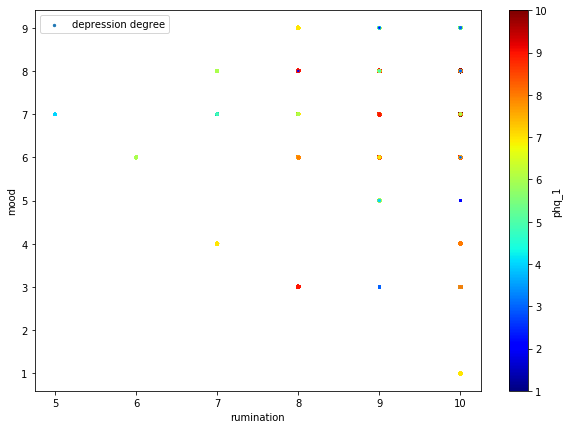

In [38]:
from matplotlib import pyplot

patient.plot(kind='scatter', x='rumination', y='mood', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

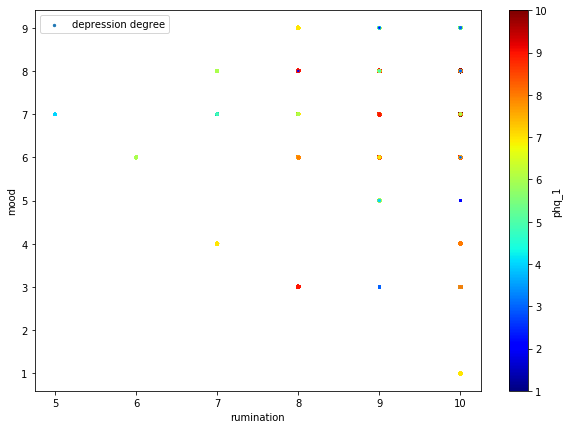

In [39]:
patient.plot(kind='scatter', x='rumination', y='mood', s=patient['phq_1'], label='depression degree', 
             c='phq_1', cmap=pyplot.get_cmap('jet'), colorbar=True, figsize=(10,7), sharex=False)

In [40]:
corr_matrix = patient.corr()

In [41]:
corr_matrix['phq_1'].sort_values(ascending=False)

phq_1                            1.000000
phq_2                            0.466299
day_sleep                        0.221935
accY                             0.130106
PlethysmogramGreen               0.093193
ple_std                          0.034811
UncalibratedBarometerAltitude    0.025414
heartR_std                       0.020777
AT_std                           0.016583
heartR                           0.012235
gyrZ                             0.003747
accX                             0.003227
UBA_std                         -0.000251
gyrX                            -0.007965
gyrY_std                        -0.024567
AirPressure                     -0.029718
SmoothedAirPressure             -0.029719
AP_std                          -0.030285
SAP_std                         -0.030555
gyrY                            -0.032497
gyrX_std                        -0.035271
alc                             -0.035529
accX_std                        -0.040061
gyrZ_std                        -0

In [42]:
socialise_scaled = scaler_st.fit_transform(test_set_st[['socialize']])
socialize_val_scaled = scaler_st.fit_transform(test_set_st[['socialize_val']])
work_time_scaled = scaler_st.fit_transform(test_set_st[['work_time']])
mood_scaled = scaler_st.fit_transform(test_set_st[['mood']])
tense_scaled = scaler_st.fit_transform(test_set_st[['tense']])
rumination_scaled = scaler_st.fit_transform(test_set_st[['rumination']])

In [43]:
time_sorted = time_st_test
time_sorted.sort()

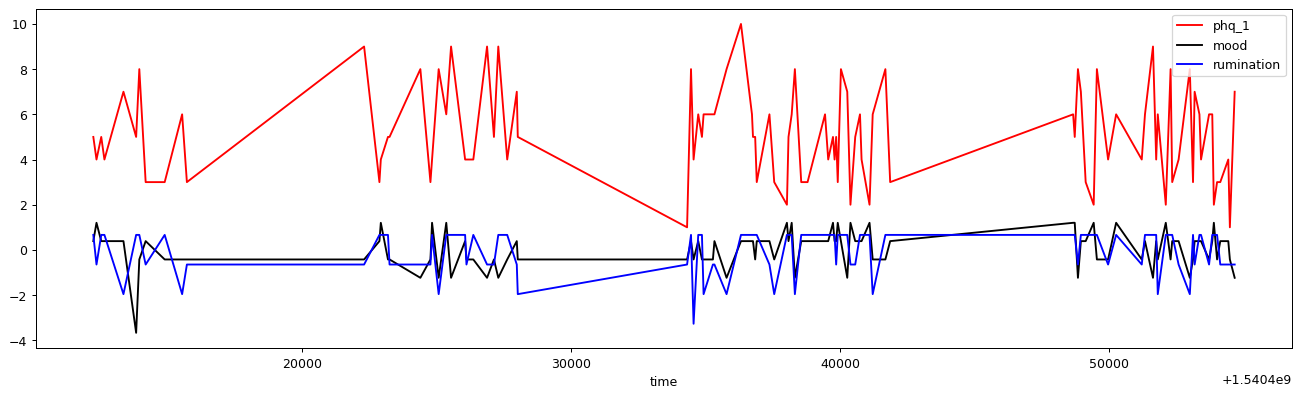

In [67]:
%matplotlib inline
s = 1000
e = 1100
xaxis = time_sorted[s:e]
yaxis = y_test_st_1[s:e]
yaxis2 = pred_test_st[s:e]
yaxis3 = socialise_scaled[s:e]
yaxis4 = socialize_val_scaled[s:e]
yaxis5 = work_time_scaled[s:e]
yaxis6 = mood_scaled[s:e]
yaxis7 = tense_scaled[s:e]
yaxis8 = rumination_scaled[s:e]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
# pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
# pyplot.plot(xaxis, yaxis3, color='green', label='socialize')
# pyplot.plot(xaxis, yaxis4, color='cyan', label='socialize_val')
# pyplot.plot(xaxis, yaxis5, color='magenta', label='sport_time')
pyplot.plot(xaxis, yaxis6, color='black', label='mood')
# pyplot.plot(xaxis, yaxis7, color='blue', label='tense')
pyplot.plot(xaxis, yaxis8, color='blue', label='rumination')
# plt.ylabel('some numbers')
pyplot.xlabel('time')

pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')

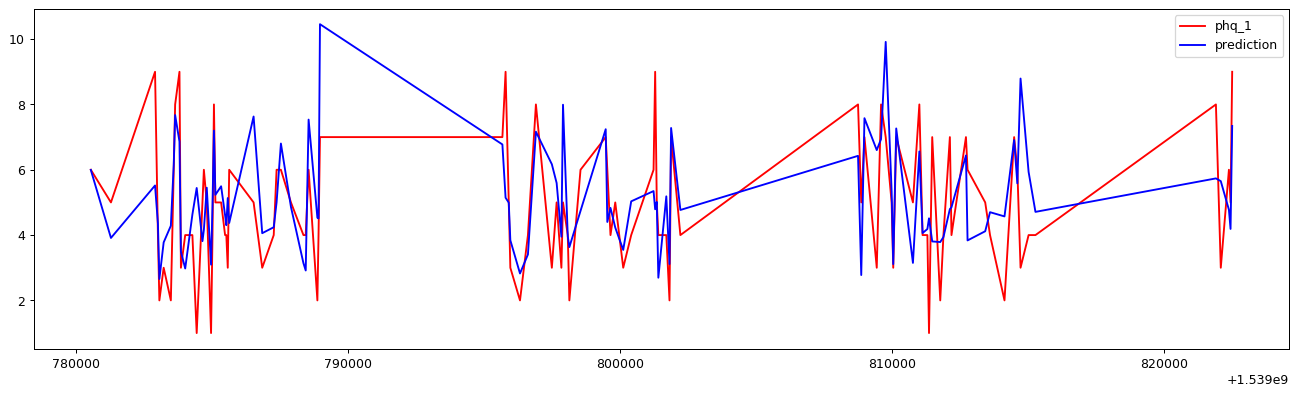

In [45]:
from matplotlib import pyplot
%matplotlib inline
xaxis = time_st_test[:100]
yaxis = y_test_st_1[:100]
yaxis2 = pred_test_st[:100]
# avg = p[['phq_1', 'phq_2']].mean(axis=1)
fig=pyplot.figure(figsize=(18, 5), dpi= 90, facecolor='w', edgecolor='k')
pyplot.plot(xaxis, yaxis, color='red', label='phq_1')
pyplot.plot(xaxis, yaxis2, color='blue', label='prediction')
pyplot.legend()
# pyplot.plot(xaxis, avg, color='green', label='avg')